# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("/Users/mahiradayal/computing/hw-8/licensing/licfile.csv")
df.head(5)

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
col_names=["LICTYPE", "LICNUMBER", "BIZCOUNTY", "BIZNAME", "BIZLINE1", "BIZLINE2", "BIZCITYSTATE", "BIZTELEPHONE", "EXPIRATION", "OWNER", "MAILLINE1", "MAILLINE2", "MAILCITYSTATE", "MAILCOUNTYCODE", "MAILCOUNTY", "MAILZIP", "TELEPHONE", "LICSUBTYPE", "CEFLAG"]
df = pd.read_csv("/Users/mahiradayal/computing/hw-8/licensing/licfile.csv", names=col_names)

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv("/Users/mahiradayal/computing/hw-8/licensing/licfile.csv", names=col_names, dtype={"EXPIRATION": str, "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [6]:
df['EXPIRATION'] = pd.to_datetime(df.EXPIRATION, format= "%d%m%Y", errors="coerce")

Check the first five expirations to make sure they look right.

In [7]:
df.EXPIRATION.head(5)

0   2017-10-08
1          NaT
2          NaT
3   2017-04-11
4          NaT
Name: EXPIRATION, dtype: datetime64[ns]

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [8]:
df.groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(10)

LICTYPE                   LICTYPE                 
Cosmetology Operator      Cosmetology Operator        151206
Apprentice Electrician    Apprentice Electrician      110593
Cosmetology Manicurist    Cosmetology Manicurist       49563
Journeyman Electrician    Journeyman Electrician       38170
A/C Technician            A/C Technician               27959
Cosmetology Esthetician   Cosmetology Esthetician      23613
Cosmetology Beauty Salon  Cosmetology Beauty Salon     23577
Master Electrician        Master Electrician           16810
A/C Contractor            A/C Contractor               16376
Barber, Class A           Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [9]:
df.groupby('LICTYPE').LICTYPE.value_counts().sort_values().head(10)

LICTYPE                                          LICTYPE                                        
Legal Service Contract Admin                     Legal Service Contract Admin                       1
Cosmetology Wig Instructor                       Cosmetology Wig Instructor                         2
Licensed Court Interpreter CE Provider           Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Manicure Specialty Saloon     Mobile Cosmetology Manicure Specialty Saloon       2
Mobile Cosmetology Esthetician/Manicure Saloon   Mobile Cosmetology Esthetician/Manicure Saloon     2
Booting CE Provider                              Booting CE Provider                                3
Barber Hair Weaving Shop                         Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                        Barber Hair Braiding Shop                          4
Mobile Cosmetology Esthetician Specialty Saloon  Mobile Cosmetology Esthetician Special

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [10]:
df[df['LICTYPE'].str.contains("Electrician", na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,NaT,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,NaT,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,NaT,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,NaT,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,NaT,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569544,Apprentice Sign Electrician,393609,PARKER,"ORTEGA, JUAN",NaN,NaN,NaN,NaN,2018-01-03,"ORTEGA, JUAN",128 JUAN CT,NaN,HUDSON OAKS TX 76087-8337,0367,PARKER,76087,8173746117,SA,N
569545,Apprentice Sign Electrician,393610,OUT OF STATE,"BARR, SYLVIA M",NaN,NaN,NaN,NaN,2018-01-03,"BARR, SYLVIA M",1015 RIVERVIEW DR,NaN,FAIRMONT WV 26554-8309,0999,OUT OF STATE,26554,3047779007,SA,N
569546,Apprentice Sign Electrician,393611,OUT OF STATE,"MALFAVON, SALVADOR H",NaN,NaN,NaN,NaN,2018-01-03,"MALFAVON, SALVADOR H",1237 E CENTER ST,NaN,KINGSPORT TN 37660-4945,0999,OUT OF STATE,37660,4237656317,SA,N
569547,Apprentice Sign Electrician,393612,WICHITA,"ARANDA, JOSE A SR",NaN,NaN,NaN,NaN,2018-01-03,"ARANDA, JOSE A SR",1108 IRELAND ST,NaN,WICHITA FALLS TX 76301-7837,0485,WICHITA,76301,9408674318,SA,N


## 8. How many of the rows of LICTYPE are NaN?

In [11]:
df.LICTYPE.isnull().sum(axis = 0)

7086

In [12]:
#Just checking
len(df.LICTYPE)

597816

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [13]:
electrician = df[df['LICTYPE'].str.contains("Electrician").eq(True)]
electrician.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,NaT,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,NaT,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,NaT,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,NaT,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,NaT,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [14]:
df['LICTYPE'] = df.LICTYPE.fillna(False)

## 10. What's the most popular kind of electrician?

In [15]:
electrician.groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(1)

LICTYPE                 LICTYPE               
Apprentice Electrician  Apprentice Electrician    110593
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:ylabel='LICTYPE,LICTYPE'>

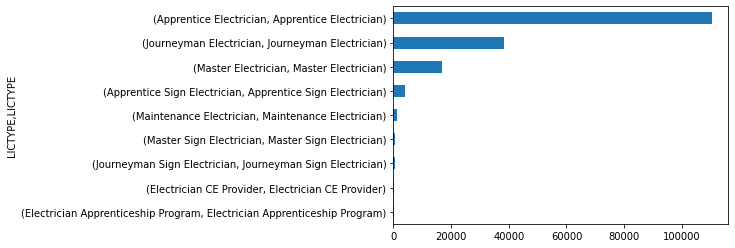

In [16]:
electrician.groupby('LICTYPE').LICTYPE.value_counts().sort_values().plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [17]:
electrician[electrician['LICTYPE'].str.contains("Sign").eq(True)].LICTYPE.count()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [18]:
df['OWNER'] = df.OWNER.fillna('')

In [19]:
df.OWNER.head(5)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
Name: OWNER, dtype: object

In [20]:
df['LASTNAME'] = df.OWNER.dropna().str.split(',').str[0]

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [21]:
df['LASTNAME'] = df.OWNER.dropna().str.split(',').str[0]

In [22]:
df.head(5)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-10-08,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,NaT,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,NaT,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-04-11,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,NaT,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [23]:
df.groupby('LASTNAME').LASTNAME.value_counts().sort_values(ascending=False).head(10)

LASTNAME   LASTNAME 
NGUYEN     NGUYEN       22286
TRAN       TRAN          8137
LE         LE            5606
GARCIA     GARCIA        5574
MARTINEZ   MARTINEZ      4701
RODRIGUEZ  RODRIGUEZ     4626
HERNANDEZ  HERNANDEZ     4390
PHAM       PHAM          3997
GONZALEZ   GONZALEZ      3634
SMITH      SMITH         3208
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [24]:
df[df.LASTNAME == 'NGUYEN'].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)

LICTYPE                  LICTYPE                
Cosmetology Manicurist   Cosmetology Manicurist     12856
Cosmetology Operator     Cosmetology Operator        4039
Cosmetology Esthetician  Cosmetology Esthetician     2881
Cosmetologist            Cosmetologist               1876
Apprentice Electrician   Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [25]:
df[df.LASTNAME == 'TRAN'].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)

LICTYPE                  LICTYPE                
Cosmetology Manicurist   Cosmetology Manicurist     4675
Cosmetology Operator     Cosmetology Operator       1475
Cosmetology Esthetician  Cosmetology Esthetician    1032
Cosmetologist            Cosmetologist               712
Apprentice Electrician   Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [26]:
df[df.LASTNAME == 'LE'].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)

LICTYPE                  LICTYPE                
Cosmetology Manicurist   Cosmetology Manicurist     3277
Cosmetology Operator     Cosmetology Operator        953
Cosmetology Esthetician  Cosmetology Esthetician     730
Cosmetologist            Cosmetologist               497
A/C Technician           A/C Technician               43
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [27]:
df[df.LASTNAME.isin(["NGUYEN", "TRAN", "LE"])].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)


LICTYPE                  LICTYPE                
Cosmetology Manicurist   Cosmetology Manicurist     20808
Cosmetology Operator     Cosmetology Operator        6467
Cosmetology Esthetician  Cosmetology Esthetician     4643
Cosmetologist            Cosmetologist               3085
Apprentice Electrician   Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [28]:
df['KO'] = df.LASTNAME.str.endswith('KO', na=False)
POP_KO = df[df.KO == True].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(1)
POP_KO

LICTYPE               LICTYPE             
Cosmetology Operator  Cosmetology Operator    67
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [29]:
TOTAL = df[df.KO == True].groupby('LICTYPE').LICTYPE.value_counts().sum()
PERCENTAGE = (POP_KO/TOTAL)*100
print(round(PERCENTAGE))

LICTYPE               LICTYPE             
Cosmetology Operator  Cosmetology Operator    36.0
Name: LICTYPE, dtype: float64


# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [30]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [31]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [32]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [33]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [34]:
df['OWNER'].str.extract(r"([A-Za-z]+), ([A-Za-z]+) ([A-Za-z]*)", expand=True)[1]

0               JIM
1               JON
2              JUAN
3             JAMES
4              JOHN
            ...    
597811       JUSTIN
597812      MATTHEW
597813        DAVID
597814    FRANCISCO
597815        DAVID
Name: 1, Length: 597816, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [35]:
df['FIRSTNAME'] = df['OWNER'].str.extract(r"([A-Za-z]+), ([A-Za-z]+) ([A-Za-z]*)", expand=True)[1]

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [36]:
df[df.FIRSTNAME.isnull()].OWNER.count()

216430

What do their names look like?

In [37]:
# NaN

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [194]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = 'NA'

How many empty first names do we have now?

In [195]:
df[df.FIRSTNAME.isnull()].OWNER.count()

0

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [38]:
df.groupby('FIRSTNAME').FIRSTNAME.value_counts().sort_values(ascending=False).head(5)

FIRSTNAME  FIRSTNAME
JOSE       JOSE         6583
MICHAEL    MICHAEL      5021
MARIA      MARIA        4536
JAMES      JAMES        4510
DAVID      DAVID        4135
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [39]:
df[df.LICTYPE.str.contains("Cosmetolog", na=False)].groupby('FIRSTNAME').FIRSTNAME.value_counts().sort_values(ascending=False).head(10)



FIRSTNAME  FIRSTNAME
MARIA      MARIA        4104
THUY       THUY         1967
PHUONG     PHUONG       1837
KIM        KIM          1497
JENNIFER   JENNIFER     1422
THANH      THANH        1320
MARY       MARY         1216
THU        THU          1179
NGOC       NGOC         1151
JESSICA    JESSICA      1136
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [40]:
df[df.LICTYPE.str.contains("Electric", na=False)].groupby('FIRSTNAME').FIRSTNAME.value_counts().sort_values(ascending=False).head(10)

FIRSTNAME    FIRSTNAME  
JOSE         JOSE           4900
MICHAEL      MICHAEL        3136
JAMES        JAMES          2786
JUAN         JUAN           2758
DAVID        DAVID          2593
JOHN         JOHN           2345
ROBERT       ROBERT         2227
CHRISTOPHER  CHRISTOPHER    1696
WILLIAM      WILLIAM        1605
LUIS         LUIS           1397
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [41]:
!pip install gender-guesser

You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [42]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [43]:
detector.get_gender('Jose')

'male'

In [44]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

In [45]:
df['FIRSTNAME'].fillna('').apply(lambda FIRSTNAME: detector.get_gender(FIRSTNAME)).head()

0    male
1    male
2    male
3    male
4    male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [46]:
df['GENDER'] = df['FIRSTNAME'].fillna('').apply(lambda FIRSTNAME: detector.get_gender(FIRSTNAME))

In [47]:
df.groupby('GENDER').GENDER.value_counts()

GENDER         GENDER       
andy           andy              18471
female         female           102818
male           male             171042
mostly_female  mostly_female     36636
mostly_male    mostly_male       22166
unknown        unknown          246683
Name: GENDER, dtype: int64

## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [48]:
import numpy as np

In [49]:
df['GENDER'] = df.GENDER.str.replace('mostly_female', 'female')
df['GENDER'] = df.GENDER.str.replace('mostly_male', 'male')
df['GENDER'] = df.GENDER.replace('andy', np.nan)
df['GENDER'] = df.GENDER.replace('unknown', np.nan)

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [50]:
df.groupby('GENDER').GENDER.value_counts()

GENDER  GENDER
female  female    139454
male    male      193208
Name: GENDER, dtype: int64

In [51]:
# Men have more licenses

Percentage_Unknown = 100 * df.GENDER.isnull().sum() / len(df)
print(Percentage_Unknown)

44.353781096524685


## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [52]:
df[df.GENDER.isnull() == True].groupby('FIRSTNAME').FIRSTNAME.value_counts().sort_values(ascending=False).head(5)

FIRSTNAME  FIRSTNAME
THANH      THANH        1364
TRANG      TRANG        1072
HONG       HONG          942
DUNG       DUNG          900
LINH       LINH          821
Name: FIRSTNAME, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [53]:
detector.get_gender('Harper')

'male'

In [54]:
detector.get_gender('Jesse')

'male'

In [55]:
detector.get_gender('Madison')

'mostly_female'


## 34. What are the most popular licenses for men? For women?

In [56]:
df[df.GENDER == 'male'].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)

LICTYPE                 LICTYPE               
Apprentice Electrician  Apprentice Electrician    66753
Journeyman Electrician  Journeyman Electrician    30190
A/C Technician          A/C Technician            17637
Master Electrician      Master Electrician        14159
Cosmetology Operator    Cosmetology Operator      10005
Name: LICTYPE, dtype: int64

In [57]:
df[df.GENDER == 'female'].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending=False).head(5)


LICTYPE                          LICTYPE                        
Cosmetology Operator             Cosmetology Operator               81320
Cosmetology Manicurist           Cosmetology Manicurist             20372
Cosmetology Esthetician          Cosmetology Esthetician            12245
Cosmetologist                    Cosmetologist                       3711
Cosmetology Operator Instructor  Cosmetology Operator Instructor     3419
Name: LICTYPE, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [58]:
df[df['LICTYPE'].str.contains("Property Tax Appraiser", na=False)].groupby('GENDER').GENDER.value_counts().sort_values(ascending=False).head()

GENDER  GENDER
male    male      1333
female  female    1038
Name: GENDER, dtype: int64

In [59]:
df[df['LICTYPE'].str.contains("Tow Truck", na=False)].groupby('GENDER').GENDER.value_counts().sort_values(ascending=False).head()


GENDER  GENDER
male    male      9110
female  female     421
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [60]:
df[df['LICTYPE'].str.contains("Tow Truck", na=False)].groupby('LICTYPE').LICTYPE.value_counts().head()

LICTYPE                                   LICTYPE                                 
Tow Truck Operator (Consent Tow)          Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Incident Management)  Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Private Property)     Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

<AxesSubplot:title={'center':'Tow Truck Breakdown'}, ylabel='Gender'>

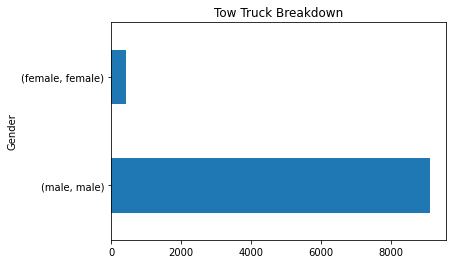

In [61]:
df[df['LICTYPE'].str.contains("Tow Truck", na=False)].groupby('GENDER').GENDER.value_counts().sort_values(ascending=False).plot(xlabel='Gender', title='Tow Truck Breakdown', kind='barh')


<AxesSubplot:title={'center':'Property Tax Appraiser Breakdown'}, ylabel='Gender'>

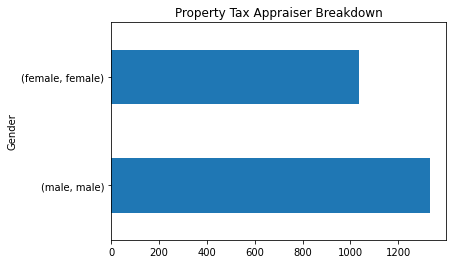

In [62]:
df[df['LICTYPE'].str.contains("Property Tax Appraiser", na=False)].groupby('GENDER').GENDER.value_counts().sort_values(ascending=False).plot(xlabel='Gender', title='Property Tax Appraiser Breakdown', kind='barh')


## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [63]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    66753
Journeyman Electrician    30190
A/C Technician            17637
Master Electrician        14159
Cosmetology Operator      10005
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [64]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,LICTYPE,LICTYPE,LICTYPE
Apprentice Electrician,66753.0,3236.0,40604.0
Journeyman Electrician,30190.0,882.0,7098.0
A/C Technician,17637.0,645.0,9677.0
Master Electrician,14159.0,354.0,2297.0
Cosmetology Operator,10005.0,81320.0,59881.0


In [65]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,Apprentice Electrician,66753.0,3236.0,40604.0
1,Journeyman Electrician,30190.0,882.0,7098.0
2,A/C Technician,17637.0,645.0,9677.0
3,Master Electrician,14159.0,354.0,2297.0
4,Cosmetology Operator,10005.0,81320.0,59881.0


In [66]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,Apprentice Electrician,66753.0,3236.0,40604.0
1,Journeyman Electrician,30190.0,882.0,7098.0
2,A/C Technician,17637.0,645.0,9677.0
3,Master Electrician,14159.0,354.0,2297.0
4,Cosmetology Operator,10005.0,81320.0,59881.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [67]:
gender_df['Total_Licenses'] = gender_df.male + gender_df.female + gender_df.unknown

In [68]:
gender_df['Percent_Known'] = ((gender_df.male + gender_df.female)/gender_df.Total_Licenses)*100

In [69]:
gender_df['Percent_Male_Known'] = ((gender_df.male/(gender_df.male + gender_df.female))*100)

In [70]:
gender_df['Percent_Female_Known'] = ((gender_df.female/(gender_df.male + gender_df.female))*100)

In [71]:
gender_df.head(5)

,license,male,female,unknown,Total_Licenses,Percent_Known,Percent_Male_Known,Percent_Female_Known
0,Apprentice Electrician,66753.0,3236.0,40604.0,110593.0,63.285199,95.376416,4.623584
1,Journeyman Electrician,30190.0,882.0,7098.0,38170.0,81.404244,97.161432,2.838568
2,A/C Technician,17637.0,645.0,9677.0,27959.0,65.388605,96.471940,3.528060
3,Master Electrician,14159.0,354.0,2297.0,16810.0,86.335515,97.560808,2.439192
4,Cosmetology Operator,10005.0,81320.0,59881.0,151206.0,60.397736,10.955379,89.044621


## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

In [110]:
gender_df[(gender_df.Total_Licenses > 2000) & (gender_df.Percent_Known > 75)].sort_values(by='male', ascending=False).head(10)

,license,male,female,unknown,Total_Licenses,Percent_Known,Percent_Male_Known,Percent_Female_Known
1,Journeyman Electrician,30190.0,882.0,7098.0,38170.0,81.404244,97.161432,2.838568
3,Master Electrician,14159.0,354.0,2297.0,16810.0,86.335515,97.560808,2.439192
13,Auctioneer,1784.0,279.0,317.0,2380.0,86.680672,86.476006,13.523994
16,Property Tax Appraiser,1333.0,1038.0,475.0,2846.0,83.309909,56.221004,43.778996


In [111]:
gender_df[(gender_df.Total_Licenses > 2000) & (gender_df.Percent_Known > 75)].sort_values(by='female', ascending=False).head(10)

,license,male,female,unknown,Total_Licenses,Percent_Known,Percent_Male_Known,Percent_Female_Known
16,Property Tax Appraiser,1333.0,1038.0,475.0,2846.0,83.309909,56.221004,43.778996
1,Journeyman Electrician,30190.0,882.0,7098.0,38170.0,81.404244,97.161432,2.838568
3,Master Electrician,14159.0,354.0,2297.0,16810.0,86.335515,97.560808,2.439192
13,Auctioneer,1784.0,279.0,317.0,2380.0,86.680672,86.476006,13.523994


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [119]:
merged = gender_df.merge(df, left_on="license", right_on="LICTYPE")
merged[merged.Percent_Female_Known>50].head(10)['TELEPHONE']

193532    2547257548
193533    8066673368
193534    3256551516
193535    2146688316
193536    9152229256
193537    9157317487
193538    8067872286
193539    4328895721
193540    3252346423
193541    4323674773
Name: TELEPHONE, dtype: object

## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

In [72]:
# The gender generator could be inaccurate (especially for the "mostly male" and "mosty female"
# Unknown really doesn't mean anything, and there are so many unknowns that it could change 
# basically all our results. Plus, male and female is binary and gender is not binary. 

If you found problems with our analysis, **how could we make improvements?**

In [73]:
# Find a way to not lump everything together as unknown! 

In [74]:
# There were some names that were actually business names, so use str contains to remove
# names containing INC and LTD so they don't mess with the gender results. 

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [75]:
violations_df = pd.read_csv("/Users/mahiradayal/computing/hw-8/licensing/violations.csv", na_values=None)
violations_df.dtypes

basis          object
city           object
complaintno    object
county         object
licenseno      object
name           object
order          object
orderDate      object
zipcode         int64
dtype: object

In [76]:
df.dtypes

LICTYPE                   object
LICNUMBER                 object
BIZCOUNTY                 object
BIZNAME                   object
BIZLINE1                 float64
BIZLINE2                 float64
BIZCITYSTATE             float64
BIZTELEPHONE             float64
EXPIRATION        datetime64[ns]
OWNER                     object
MAILLINE1                 object
MAILLINE2                 object
MAILCITYSTATE             object
MAILCOUNTYCODE            object
MAILCOUNTY                object
MAILZIP                   object
TELEPHONE                 object
LICSUBTYPE                object
CEFLAG                    object
LASTNAME                  object
KO                          bool
FIRSTNAME                 object
GENDER                    object
dtype: object

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [130]:
violations_merged = violations_df.merge(df, left_on="licenseno", right_on="LICNUMBER")
#violations_merged.shape
violations_merged.head(5)

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,KO,FIRSTNAME,GENDER
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77031,7132701521,FM,N,FORMAL NAILS,False,NaN,NaN
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,0039,BRAZORIA,77584,8325337866,FM,N,LUU LUU NAILS & SPA,False,NaN,NaN
2,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072,Cosmetology Esthetician/Manicure Salon,...,0039,BRAZORIA,77584,8325337866,FM,N,LUU LUU NAILS & SPA,False,NaN,NaN
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77346,2818525330,FM,N,FANCY NAILS,False,NaN,NaN
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,0201,HARRIS,77083,2814956262,CS,N,1 HOLLYWOOD NAILS,False,NaN,NaN


## 39. Find each violation involving a failure with records. Use a regular expression.

In [150]:
violations_merged[violations_merged['basis'].str.contains(r"fail")==True]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,KO,FIRSTNAME,GENDER,failure
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,HARRIS,77031,7132701521,FM,N,FORMAL NAILS,False,NaN,NaN,fail
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,BRAZORIA,77584,8325337866,FM,N,LUU LUU NAILS & SPA,False,NaN,NaN,fail
2,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072,Cosmetology Esthetician/Manicure Salon,...,BRAZORIA,77584,8325337866,FM,N,LUU LUU NAILS & SPA,False,NaN,NaN,fail
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,HARRIS,77346,2818525330,FM,N,FANCY NAILS,False,NaN,NaN,fail
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,HARRIS,77083,2814956262,CS,N,1 HOLLYWOOD NAILS,False,NaN,NaN,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Respondent failed to clean and sanitize whirlp...,BAYTOWN,COS20130013338,HARRIS,694870,"NGUYEN, CINDY THI",Respondent is assessed an administrative penal...,10/2/2014,77521,Cosmetology Beauty Salon,...,LUBBOCK,79424,8067942964,CS,N,NAILS BY CINDY AND FACIALS,False,NaN,NaN,fail
84,Respondent failed to keep a record of the date...,HOUSTON,COS20140015709,HARRIS,724124,"NGUYEN, LIEM T",Respondent is assessed an administrative penal...,9/29/2014,77028,Cosmetology Esthetician/Manicure Salon,...,HARRIS,77059,2819981053,FM,N,HAPPY NAILS SPA,False,NaN,NaN,fail
86,"Respondent failed to clean, disinfect, and ste...",HOUSTON,COS20140016481,HARRIS,738145,"NGUYEN, KIM DUNG THI",Respondent is assessed an administrative penal...,9/29/2014,77087,Cosmetology Manicure Salon,...,HARRIS,77022,7136974773,MS,N,SANY'S NAIL,False,NaN,NaN,fail
88,Respondent failed to keep a record of the date...,HOUSTON,COS20130020057,HARRIS,743316,"NGUYEN, HANG THI",Respondent is assessed an administrative penal...,9/8/2014,77021,Cosmetology Esthetician/Manicure Salon,...,HARRIS,77021,7137477705,FM,N,RED APPLE NAILS,False,NaN,NaN,fail


## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [164]:
violations_merged['order'].str.extract("Respondent is assessed an administrative penalty in the amount of \$(\w+,?\w+).", expand=False)  


0       300
1       500
2       750
3     1,875
4       375
      ...  
85      150
86      575
87      500
88    1,000
89    1,250
Name: order, Length: 90, dtype: object

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [188]:
violations_merged['fine'] = violations_merged['order'].str.extract("Respondent is assessed an administrative penalty in the amount of \$(\w+,?\w+).", expand=False)  
violations_merged['fine'] = violations_merged['fine'].apply(lambda x: x.replace(',', ''))
violations_merged['fine'].astype(int)
violations_merged['fine'].head(20)

0      300
1      500
2      750
3     1875
4      375
5     1800
6     1125
7      750
8      925
9      575
10    1000
11     550
12     500
13     750
14    1125
15     500
16     500
17    1500
18     375
19     500
Name: fine, dtype: object

## 42. Which orders results in the top fines?

In [193]:
violations_merged.sort_values(by=['money'], ascending=False).head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,KO,FIRSTNAME,GENDER,failure,money,fine
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,Cosmetology Esthetician/Manicure Salon,...,2815758181,FM,N,NAILS N NAILS,False,NaN,NaN,fail,925,925
81,Respondent failed to clean and sanitize whirlp...,HOUSTON,COS20140021128,HARRIS,679804,"NGUYEN, DANNY DUONG",Respondent is assessed an administrative penal...,11/6/2014,77090,Cosmetology Esthetician/Manicure Salon,...,2818959595,FM,N,QUICK NAILS,False,NaN,NaN,fail,875,875
72,Respondent possessed an electric drill other t...,HOUSTON,COS20150004587,HARRIS,671920,"NGUYEN, NINA",Respondent is assessed an administrative penal...,4/7/2015,77084,Cosmetology Esthetician/Manicure Salon,...,2815792484,FM,N,NAILS BY HELEN,False,NaN,NaN,fail,875,875
36,Respondent failed to keep a record of the date...,TOMBALL,COS20160008123,HARRIS,739716,"NGUYEN, KENNEDY DANG KH",Respondent is assessed an administrative penal...,3/28/2016,77377,Cosmetology Esthetician/Manicure Salon,...,8322025889,FM,N,EVA NAILS & SPA,False,NaN,NaN,fail,850,850
24,Respondent failed to keep a record of the date...,HOUSTON,COS20160011021,HARRIS,745638,"NGUYEN, HAI",Respondent is assessed an administrative penal...,6/22/2016,77016,Cosmetology Esthetician/Manicure Salon,...,8322353873,FM,N,PROFESSIONAL NAILS,False,NaN,NaN,fail,750,750


## 43. Are you still here???

I'm sure impressed.

In [78]:
# Everything hurts and I don't remember what sunlight looks like. 